In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import numpy as np
import pandas as pd  
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
from datetime import time, timedelta, datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import chi2
# from whakaari import datetimeify
# from tsfresh.transformers import FeatureSelector
from textwrap import wrap
from matplotlib.animation import FuncAnimation,PillowWriter
import os
import re
import h5py
import obspy

In [2]:
save_path=r'/Bedretto'
well_trace_path =save_path + r'/borehole_trajectories_v1.0.2'
well_ST1_file_name = r'/ST1_borehole_information.csv'

In [3]:
df = pd.read_csv(
    well_trace_path+well_ST1_file_name,
    sep=',',            # Specify the separator (comma is default)
    header=0,           # First row is the header (default is 0)
    encoding='utf-8',   # Encoding of the file (default is 'utf-8')
    dtype=None,         # Specify data types if necessary
    index_col=0      # Set index column if necessary
)

In [4]:
df = df[df['Elevation (m)']>=1280]
df_int7=df[(df['Elevation (m)']>=1299.29) & (df['Elevation (m)']<=1326.03)]
df_int8=df[(df['Elevation (m)']>=1327.16) & (df['Elevation (m)']<=1349.89)]
df_int9=df[(df['Elevation (m)']>=1351.02) & (df['Elevation (m)']<=1361.78)]
df_int10=df[(df['Elevation (m)']>=1362.9) & (df['Elevation (m)']<=1375.74)]
df_int9_10 = df[(df['Elevation (m)']>=1351.02) & (df['Elevation (m)']<=1375.74)]
df_int11=df[(df['Elevation (m)']>=1376.84) & (df['Elevation (m)']<=1390.3)]
df_int12=df[(df['Elevation (m)']>=1391.4) & (df['Elevation (m)']<=1396.87)]
df_int13=df[(df['Elevation (m)']>=1397.96) & (df['Elevation (m)']<=1411.28)]
df_int14=df[(df['Elevation (m)']>=1412.36) & (df['Elevation (m)']<=1451.64)]

In [5]:
df_allwells_list=[]
well_name_list = []
for file_name in os.listdir(well_trace_path):
    
    if os.path.isfile(os.path.join(well_trace_path, file_name)):
        df_well = pd.read_csv(
            os.path.join(well_trace_path, file_name),
            sep=',',            # Specify the separator (comma is default)
            header=0,           # First row is the header (default is 0)
            encoding='utf-8',   # Encoding of the file (default is 'utf-8')
            dtype=None,         # Specify data types if necessary
            index_col=0      # Set index column if necessary
        )
        df_allwells_list.append(df_well)
        # Extract text before the first underscore
        extracted_part = file_name.split('_')[0]
        # Append to the list
        well_name_list.append(extracted_part)
        

In [6]:
MB1 = df_allwells_list[0]
MB2 =df_allwells_list[1]
MB3 =df_allwells_list[2]
MB4 =df_allwells_list[3]
MB5 =df_allwells_list[4]
MB6 =df_allwells_list[5]
MB7 =df_allwells_list[6]
MB8 =df_allwells_list[7]
ST2 =df_allwells_list[9]

<IPython.core.display.Javascript object>


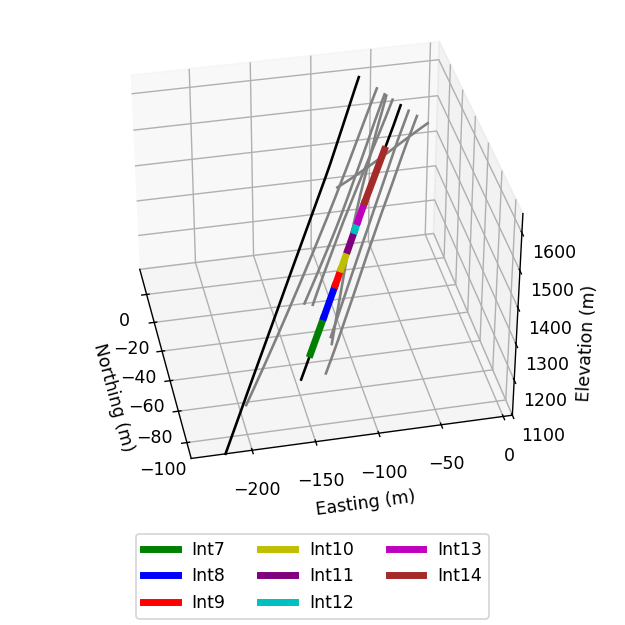

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Step 1: Extract starting points of each well

# Assuming your DataFrame is named 'df' and contains 'Easting', 'Northing', 'Elevation' columns
fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': '3d'})
plt.subplots_adjust(left=0.05, right=0.95, top=1, bottom=0.2)
# Plotting the 3D line plot without markers
ax.plot3D(df['Northing (m)'] , df['Easting (m)'],df['Elevation (m)'], linestyle='-',color = 'k')
for i in range(len(well_name_list)-1):
    if i != 7:
        if i==8:
            ax.plot3D(df_allwells_list[i]['Northing (m)'], df_allwells_list[i]['Easting (m)'],df_allwells_list[i]['Elevation (m)'], linestyle='-',color = 'k')
        else:
            ax.plot3D(df_allwells_list[i]['Northing (m)'] , df_allwells_list[i]['Easting (m)'],df_allwells_list[i]['Elevation (m)'], linestyle='-',color = 'gray')
        

# Label the well name "ST1" directly on the plot
# Choose a specific point to place the label (e.g., the first point in the DataFrame)
x_label = df['Northing (m)'].iloc[300]
y_label = df['Easting (m)'].iloc[300]
z_label = df['Elevation (m)'].iloc[300]

# Add text annotation
# ax.text(x_label, y_label, z_label, 'ST1', color='k', fontsize=12)


ax.plot3D(df_int7['Northing (m)'] , df_int7['Easting (m)'],df_int7['Elevation (m)'], linestyle='-',linewidth =4.0 , color='g',label='Int7')
ax.plot3D(df_int8['Northing (m)'] , df_int8['Easting (m)'],df_int8['Elevation (m)'], linestyle='-',linewidth =4.0 , color='b',label='Int8')
ax.plot3D(df_int9['Northing (m)'] , df_int9['Easting (m)'],df_int9['Elevation (m)'], linestyle='-',linewidth =4.0 , color='r',label='Int9')
ax.plot3D(df_int10['Northing (m)'] , df_int10['Easting (m)'],df_int10['Elevation (m)'], linestyle='-',linewidth =4.0 , color='y',label='Int10')
ax.plot3D(df_int11['Northing (m)'] , df_int11['Easting (m)'],df_int11['Elevation (m)'], linestyle='-',linewidth =4.0 , color='purple',label='Int11')
ax.plot3D(df_int12['Northing (m)'] , df_int12['Easting (m)'],df_int12['Elevation (m)'], linestyle='-',linewidth =4.0 , color='c',label='Int12')
ax.plot3D(df_int13['Northing (m)'] , df_int13['Easting (m)'],df_int13['Elevation (m)'], linestyle='-',linewidth =4.0 , color='m',label='Int13')
ax.plot3D(df_int14['Northing (m)'] , df_int14['Easting (m)'],df_int14['Elevation (m)'], linestyle='-',linewidth =4.0 , color='brown',label='Int14')



    
# Setting labels
ax.set_ylabel('Easting (m)')
ax.set_xlabel('Northing (m)')
ax.set_zlabel('Elevation (m)')
# Reverse the Northing axis by setting limits
ax.set_xlim(max(df['Northing (m)']), min(df['Northing (m)']))
ax.set_zlim(1100,1650)
# Set the aspect ratio to make the plot look proportionate
# ax.set_box_aspect([1, 1, 1.3])  # Length ratios for x, y, and z (adjust as needed)
# ax.legend(loc='best')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# Optional: Title
# ax.set_title('3D Trace Plot')
# Setting the perpendicular view to the line of starting points
ax.view_init(elev=35, azim=-12) 

# Show plot
# plt.show()

In [8]:
catalog_path=r'/Bedretto/BULGGHighQualitySeismicCatalogs/Phase2A'
# get the required catalog
catalog_files = os.listdir(catalog_path)
# Filter to get only the 'filtered' files
catalog_filtered_files = [file for file in catalog_files if 'HypoDDLoc' in file]

# Function to extract the number from the filename
def extract_number_catalog(filename):
    match = re.search(r'Int(\d+)_Ph2_HypoDDLoc', filename)
    if match:
        return int(match.group(1))
    return float('inf')  # Return a default large number if no match
  

# Sort the files based on the extracted number
catalog_filtered_files_sorted = sorted(catalog_filtered_files, key=extract_number_catalog,reverse=False)

df_catalog_list=[]
for filename in catalog_filtered_files_sorted:
    # Construct the full file path
    file_path = os.path.join(catalog_path, filename)

    df_catalog = pd.read_csv(file_path,header=0)

    df_catalog_list.append(df_catalog)

In [9]:
MEQ_p2_int8 = df_catalog_list[0]
MEQ_p2_int9_10 = df_catalog_list[-1]
MEQ_p2_int11 = df_catalog_list[1]

In [10]:
catalog_path=r'/Bedretto/BULGGHighQualitySeismicCatalogs/Phase2B'
# get the required catalog
catalog_files = os.listdir(catalog_path)
# Filter to get only the 'filtered' files
catalog_filtered_files = [file for file in catalog_files if 'HypoDDLoc' in file]

# Function to extract the number from the filename
def extract_number_catalog(filename):
    match = re.search(r'Int(\d+)', filename)
    if match:
        return int(match.group(1))
    return float('inf')  # Return a default large number if no match
  

# Sort the files based on the extracted number
catalog_filtered_files_sorted = sorted(catalog_filtered_files, key=extract_number_catalog)#,reverse=False

df_catalog_list=[]
for filename in catalog_filtered_files_sorted:
    # Construct the full file path
    file_path = os.path.join(catalog_path, filename)

    df_catalog = pd.read_csv(file_path,header=0)

    df_catalog_list.append(df_catalog)

In [11]:
MEQ_p2b_int11 = df_catalog_list[0]

In [12]:
df_catalog_list = [MEQ_p2_int8, MEQ_p2_int9_10, MEQ_p2_int11, MEQ_p2b_int11]

In [13]:
injection_start_list = [datetime(2022, 6, 22, 4,0,0),datetime(2023, 3, 14,11,0,0),
                        datetime(2023, 4, 18,15,0,0),datetime(2023, 7, 12,8,0,0)]###in8, int9+10, int11,int11 phase2b

inj_start_int8 = injection_start_list[0]
inj_start_int9_10 = injection_start_list[1]
inj_start_int11 = injection_start_list[2]
inj_start_int11_2b = injection_start_list[3]

<IPython.core.display.Javascript object>


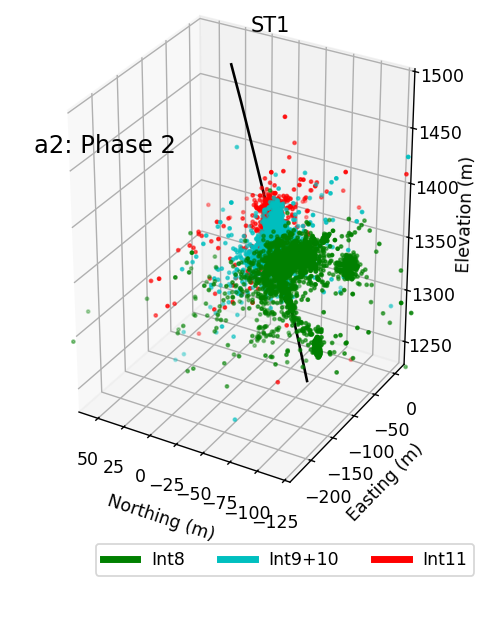

original shape: (9369, 7)
sim shape: (4057, 7)
original shape: (6002, 7)
sim shape: (5668, 7)
original shape: (3848, 7)
sim shape: (2452, 7)
original shape: (4615, 7)
sim shape: (3397, 7)


In [14]:
# df = df[(df['Elevation (m)']>=1280) &(df['Elevation (m)']<=1410)]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your DataFrame is named 'df' and contains 'Easting', 'Northing', 'Elevation' columns
fig, ax = plt.subplots(figsize=(4,5),subplot_kw={'projection': '3d'})
plt.subplots_adjust(left=0, right=0.95, top=1, bottom=0.2)
# Plotting the 3D line plot without markers
ax.plot3D(df['Northing (m)'] , df['Easting (m)'],df['Elevation (m)'], linestyle='-',color = 'k')
# Label the well name "ST1" directly on the plot
# Choose a specific point to place the label (e.g., the first point in the DataFrame)
x_label = df['Northing (m)'].iloc[300]-10
y_label = df['Easting (m)'].iloc[300]
z_label = df['Elevation (m)'].iloc[300]+10

# Add text annotation
ax.text(x_label, y_label, z_label+50, 'ST1', color='k', fontsize=12)


# ax.plot3D(df_int7['Northing (m)'] , df_int7['Easting (m)'],df_int7['Elevation (m)'], linestyle='-',linewidth =4.0 , color='g',label='Int7')
ax.plot3D(df_int8['Northing (m)'] , df_int8['Easting (m)'],df_int8['Elevation (m)'], linestyle='-',linewidth =4.0 , color='g',label='Int8')
# ax.plot3D(df_int9['Northing (m)'] , df_int9['Easting (m)'],df_int9['Elevation (m)'], linestyle='-',linewidth =4.0 , color='b',label='Int9')
# ax.plot3D(df_int10['Northing (m)'] , df_int10['Easting (m)'],df_int10['Elevation (m)'], linestyle='-',linewidth =4.0 , color='y',label='Int10')
ax.plot3D(df_int9_10['Northing (m)'] , df_int9_10['Easting (m)'],df_int9_10['Elevation (m)'], linestyle='-',linewidth =4.0 , color='c',label='Int9+10')
ax.plot3D(df_int11['Northing (m)'] , df_int11['Easting (m)'],df_int11['Elevation (m)'], linestyle='-',linewidth =4.0 , color='r',label='Int11')
# ax.plot3D(df_int12['Northing (m)'] , df_int12['Easting (m)'],df_int12['Elevation (m)'], linestyle='-',linewidth =4.0 , color='c',label='Int12')
# ax.plot3D(df_int13['Northing (m)'] , df_int13['Easting (m)'],df_int13['Elevation (m)'], linestyle='-',linewidth =4.0 , color='m',label='Int13')
# ax.plot3D(df_int14['Northing (m)'] , df_int14['Easting (m)'],df_int14['Elevation (m)'], linestyle='-',linewidth =4.0 , color='brown',label='Int14')



# color_list=['g','b','r','y','purple','c','m','brown']
color_list_sim = ['g','c','r','r'] #['g','g','b','r','r'] ## int_c1, int_c2, int 9+10, int 11 p2a, int11 p2b
df_catalog_list_sim = [ MEQ_p2_int8, MEQ_p2_int9_10, MEQ_p2_int11, MEQ_p2b_int11] #[MEQ_p2_int8, MEQ_p2_int8, MEQ_p2_int9_10, MEQ_p2_int11, MEQ_p2b_int11]##df_catalog_list[1:4]##??
inj_start_list_sim=[ inj_start_int8, inj_start_int9_10, inj_start_int11, inj_start_int11_2b]#[inj_start_int8, inj_start_int8, inj_start_int9_10, inj_start_int11, inj_start_int11_2b]
MEQ_lim_list = [ [86000,142255],[3000,58000],[79900,84120],[17200,22379]] #[[3500,55739], [86000,142255],[3000,58000],[79900,84120],[17200,22379]]


for i in range(len(df_catalog_list_sim)):
    df_catalog = df_catalog_list_sim[i]
    print('original shape:',np.shape(df_catalog))
    time_MEQ = df_catalog['Time']
    time_MEQ = [obspy.UTCDateTime(i) for i in time_MEQ]
    
    injection_start = inj_start_list_sim[i]
    inj_start = obspy.UTCDateTime(injection_start)
    time_MEQ_ref = np.array([t - inj_start for t in time_MEQ])
    MEQ_lim =MEQ_lim_list[i]
    ind = np.where((time_MEQ_ref>=MEQ_lim[0])&(time_MEQ_ref<=MEQ_lim[1]))[0]
    df_catalog= df_catalog.iloc[ind,:]
    print('sim shape:',np.shape(df_catalog))
    
    
    eastern = df_catalog['Eastern Bedretto']
    northern = df_catalog['Northern Bedretto']
    depth = df_catalog['Depth']
    ax.scatter3D(northern , eastern,depth, s =3,color=color_list_sim[i])
    
# Setting labels
ax.set_ylabel('Easting (m)')
ax.set_xlabel('Northing (m)')
ax.set_zlabel('Elevation (m)')
# Reverse the Northing axis by setting limits
ax.set_xlim(max(df['Northing (m)'])+50, min(df['Northing (m)']-20))
# ax.set_zlim(1230,1420)
# 
# ax.set_ylim(-200,200)
ax.text3D(x_label, y_label+1300, z_label+1100+80, 'a2: Phase 2', fontsize=14, 
        horizontalalignment='center', verticalalignment='center', 
        transform=ax.transAxes)
# Set the aspect ratio to make the plot look proportionate
ax.set_box_aspect([1, 1, 1.4])  # Length ratios for x, y, and z (adjust as needed)
# ax.legend(loc='best')
ax.legend(loc='upper center', bbox_to_anchor=(0.6, -0.1), ncol=4)
# Optional: Title
# ax.set_title('3D Trace Plot')
# Show plot
# plt.show()
